<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyMATH</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">py<b style=color:red;>MATH</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyMATH.png"></td>
</tr>
</table>

----
# `pyMATH`

pyMATH, a program package for playing with math in python.

----
# Triangulation and refinement

In [1]:
from matplotlib.tri import Triangulation, TriAnalyzer, UniformTriRefiner
import matplotlib.pyplot as plt
import numpy as np

----
## Test function

Define a 2D test function, e.g. the Gaussian function:
$$
f(x,y) = e^{\displaystyle -\frac{1}{2} \left[ \frac{(x-\mu)^2}{\sigma^2} + \frac{(y-\mu)^2}{\sigma^2} \right]}
$$
with $x,y$ variables, $\mu$ mean, and $\sigma$ standard deviation.

In [2]:
def fanalytical(x, y):
    """
    An analytical function representing experiment results.
    """
    x = 2 * x
    r1 = np.sqrt((0.5 - x)**2 + (0.5 - y)**2)
    theta1 = np.arctan2(0.5 - x, 0.5 - y)
    r2 = np.sqrt((-x - 0.2)**2 + (-y - 0.2)**2)
    theta2 = np.arctan2(-x - 0.2, -y - 0.2)
    z = (4 * (np.exp((r1/10)**2) - 1) * 30 * np.cos(3 * theta1) +
         (np.exp((r2/10)**2) - 1) * 30 * np.cos(5 * theta2) +
         2 * (x**2 + y**2))
    return (np.max(z) - z) / (np.max(z) - np.min(z))

In [3]:
def fgauss(x,y,mu=0,sigma=1):
    """ Gaussian function in 2D """
    f = np.exp(-0.5*(x-mu)**2/sigma**2 -0.5*(y-mu)**2/sigma**2) #/ sigma / (2*np.pi)
    return f

In [11]:
def f(x,y,mu=0,sigma=1):
    f = fanalytical(x, y)
    f = fgauss(x,y,mu,sigma)
    return f

----
## Data generation

Create an **irregularly** sampled test case, and the **regularly** samples original data.

In [12]:
ntest = 40
# Random points
random_gen = np.random.RandomState(seed=19680801)
x_test = random_gen.uniform(-1., 1., size=ntest)
y_test = random_gen.uniform(-1., 1., size=ntest)
z_test = f(x_test, y_test)
# real points
x_real = np.linspace(-1.,1.,101)
y_real = np.linspace(-1.,1.,101)
X_real,Y_real = np.meshgrid(x_real,y_real)
Z_real = f(X_real, Y_real)

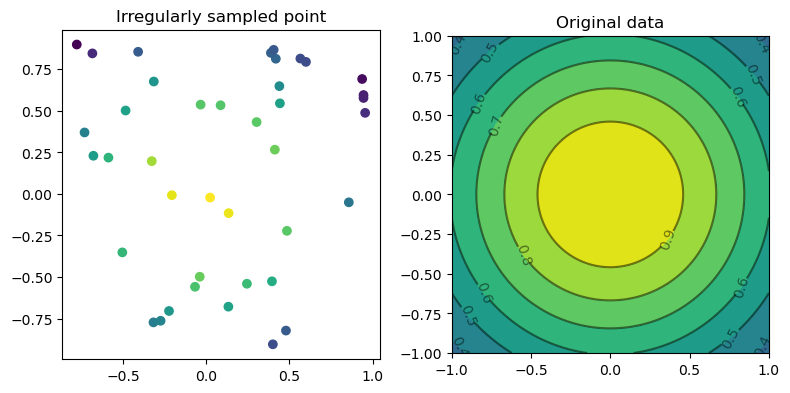

In [13]:
fig, axs = plt.subplots(1,2,figsize=(8,8))
levels=np.linspace(0,1,11)
axs[0].set_aspect('equal')
axs[0].set_title("Irregularly sampled point")
axs[0].scatter(x_test,y_test,c=z_test,cmap='viridis')
axs[1].set_title('Original data')
axs[1].set_aspect('equal')
cs1=axs[1].contourf(X_real, Y_real,Z_real,levels=levels,cmap='viridis')
cs2=axs[1].contour(X_real, Y_real,Z_real,levels=levels,colors='black',alpha=0.5)
axs[1].clabel(cs2,colors='black',inline=True,fmt='{:.1f}'.format)

plt.tight_layout()

----
## Triangulation

Triangulate the irregular points with `Triangulation` from the `matplotlib.tri` package.

In [14]:
# meshing with Delaunay triangulation
tri = Triangulation(x_test, y_test)
ntri = tri.triangles.shape[0]

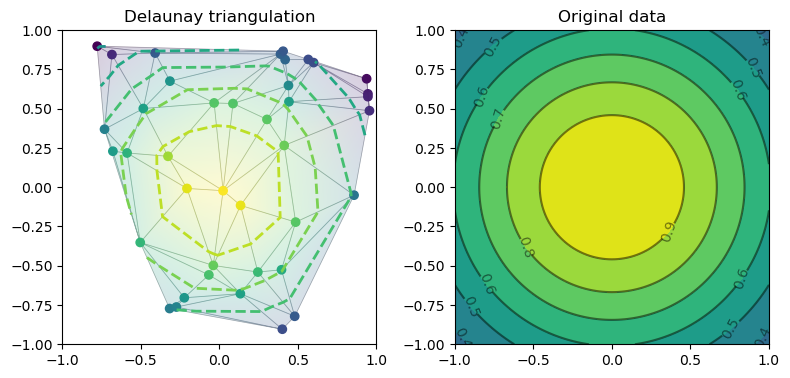

In [15]:
fig, axs = plt.subplots(1,2,figsize=(8,8))
axs[0].set_aspect('equal')
axs[0].set_xlim([-1,1]);axs[0].set_ylim([-1,1])
axs[0].set_title("Delaunay triangulation")
axs[0].triplot(tri,linewidth=0.5,color='black',alpha=0.3)
axs[0].scatter(x_test,y_test,c=z_test,cmap='viridis')
axs[0].tricontour(tri,z_test,levels=levels, linewidths=2,linestyles='dashed',cmap='viridis')
axs[0].tripcolor(tri,z_test,shading='gouraud',cmap='viridis',alpha=0.2)
axs[1].set_title('Original data')
axs[1].set_aspect('equal')
cs1=axs[1].contourf(X_real, Y_real,Z_real,levels=levels,cmap='viridis')
cs2=axs[1].contour(X_real, Y_real,Z_real,levels=levels,colors='black',alpha=0.5)
axs[1].clabel(cs2,colors='black',inline=True,fmt='{:.1f}'.format)

plt.tight_layout()

----
## Refinement

Refine the triangulated data with the `UniformTriRefiner` from the `matplotlib.tri` package.

In [16]:
# refining the data
refiner = UniformTriRefiner(tri)
tri_refi, z_test_refi = refiner.refine_field(z_test, subdiv=1)

# masking badly shaped triangles at the border of the triangular mesh.
mask = TriAnalyzer(tri_refi).get_flat_tri_mask(0.1)
tri_refi.set_mask(mask)

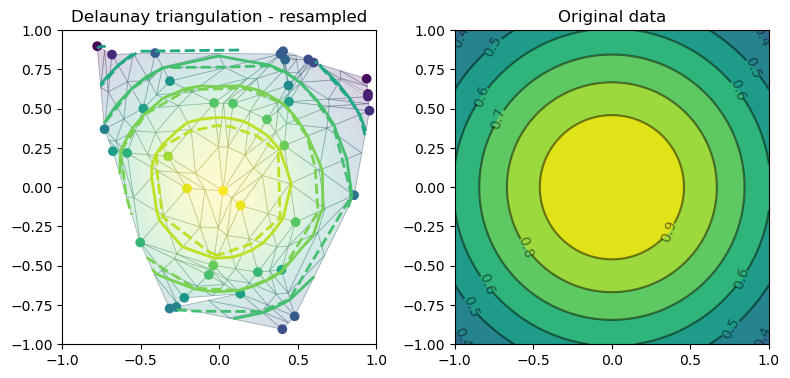

In [17]:
fig, axs = plt.subplots(1,2,figsize=(8,8))
axs[0].set_aspect('equal')
axs[0].set_xlim([-1,1]);axs[0].set_ylim([-1,1])
axs[0].set_title("Delaunay triangulation - resampled")
axs[0].triplot(tri_refi,linewidth=0.5,color='black',alpha=0.3)
axs[0].scatter(x_test,y_test,c=z_test,cmap='viridis')
axs[0].tricontour(tri, z_test, levels=levels,linewidths=2,linestyles='dashed',cmap='viridis')
axs[0].tricontour(tri_refi, z_test_refi, levels=levels,linewidths=2,linestyles='solid',cmap='viridis')
axs[0].tripcolor(tri_refi,z_test_refi,shading='gouraud',cmap='viridis',alpha=0.2)
axs[1].set_title('Original data')
axs[1].set_aspect('equal')
cs1=axs[1].contourf(X_real, Y_real,Z_real,levels=levels,cmap='viridis')
cs2=axs[1].contour(X_real, Y_real,Z_real,levels=levels,colors='black',alpha=0.5)
axs[1].clabel(cs2,colors='black',inline=True,fmt='{:.1f}'.format)

plt.tight_layout()

----